In [1]:
#Don't mind this BOX
import os
# Retrieve current working directory (`cwd`)
cwd = os.getcwd()
cwd

# Change directory 
os.chdir("/Users/alex/Desktop/vodafone")

# List all files and directories in current directory
#os.listdir('.')

In [2]:
#Logistic Regression classifier (good accuracy)
#Some packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

#Load data without storeID
df=pd.read_csv('data_train1.csv')
df=df.drop(['Store_ID'],axis=1)

In [3]:
#Fix the missing values

df['Metratura_scaled'] = df['Metratura_scaled'].replace(0, np.NaN)
# count the number of NaN values in each column
print(df.isnull().sum())
print(df.shape)
#Substitute the Nan with the mean 
df.fillna(df['Metratura_scaled'].mean(), inplace=True)
#print(df)

Metratura_scaled                 5
FTE_scaled                       0
PTE_scaled                       0
QAC_Oct_scaled                   0
QAC_Nov_scaled                   0
QAC_Dec_scaled                   0
QAC_Jan_scaled                   0
QAC_Feb_scaled                   0
QAC_Mar_scaled                   0
TNPS_Oct_scaled                  0
TNPS_Nov_scaled                  0
TNPS_Dec_scaled                  0
TNPS_Jan_scaled                  0
TNPS_Feb_scaled                  0
Tipologia_encoded                0
Localita_encoded                 0
area_encoded                     0
SM si/no_encoded                 0
Provincia_encoded                0
Footfall                         0
night_Fixed_CB_%_scaled_200      0
midday_Fixed_CB_%_scaled_200     0
CB_Night_scaled_200              0
CB_Midday_scaled_200             0
CB_Weekend_scaled_200            0
night_MEAN_scaled_ARPU_200       0
night_MIN_scaled_ARPU_200        0
night_MAX_scaled_ARPU_200        0
midday_MEAN_scaled_A

In [4]:
#Choose the target 

X=df.iloc[:,:-1].values
y=df['Footfall_classif'].values

[[ 1.         -0.12493083 -0.10771123 ...,  0.11556888 -0.16778677
   0.11579507]
 [-0.12493083  1.         -0.33717258 ...,  0.16175894 -0.04130633
   0.07793883]
 [-0.10771123 -0.33717258  1.         ..., -0.18106336  0.04854124
  -0.13009963]
 ..., 
 [ 0.11556888  0.16175894 -0.18106336 ...,  1.         -0.44390059
   0.52452432]
 [-0.16778677 -0.04130633  0.04854124 ..., -0.44390059  1.         -0.45279679]
 [ 0.11579507  0.07793883 -0.13009963 ...,  0.52452432 -0.45279679  1.        ]]

 

-0.0234112041007
0.406999270973
0.0960249729788
0.162755720254
0.0149837102526
0.183390858178
0.231155666838
0.226868547478
0.164068577143
-0.0386574108513
-0.0759012788192
-0.0612771505791
-0.051933435779
-0.0879973915844
0.318205479855
-0.0277974661379
-0.178233693709
0.25461581907
-0.0288900622174
0.86303199239
-0.0233162363947
0.0119577235021
-0.0537207892896
0.0147809066689
0.0786179136876
-0.00979086910458
-0.0820872477741
-0.0118834689443
-0.0282568020436
-0.0942745055238
0.093992015102
-

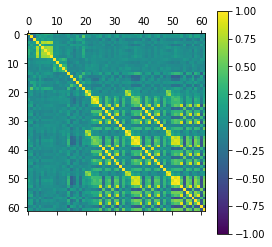

In [5]:
#Calculate Correlation Matrix

corrcoef_mat = np.corrcoef(X, rowvar = False)
figure = plt.matshow(corrcoef_mat)
plt.colorbar()
figure.set_clim(-1,1)
print(corrcoef_mat)

#Correlation with Features
print('\n \n')
for i in range(X.shape[1]):
    print(np.corrcoef(X[:, i], y)[0,1])

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [7]:
#Apply the regression
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)

#calculate accuracy
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('accuracy = ',accuracy)

#Calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predicted_classes, y_test)
print('mse = ',mse)


accuracy =  0.646153846154
mse =  0.353846153846


In [8]:
print(predicted_classes)
print('\n VS \n')
print(y_test)

[0 2 2 1 0 2 0 0 2 2 2 2 2 2 2 0 1 2 2 0 0 0 1 1 1 1 1 2 0 0 1 2 2 0 2 2 2
 1 0 0 1 2 2 0 0 1 1 1 0 1 2 2 0 2 1 1 2 0 2 1 1 2 2 2 0]

 VS 

[0 1 1 0 1 1 0 1 2 1 2 1 2 2 2 0 0 2 1 1 0 0 1 1 1 0 1 1 0 1 0 2 2 0 2 2 2
 0 1 0 1 2 2 0 0 0 1 1 0 1 1 2 0 1 1 1 2 0 1 2 0 2 2 2 0]
